In [5]:
'This module executes a simulation. User input is skipped for testing purposes'
# from MD_simulation.animation import POSITIONS
from coordinates import *
from neighbors2 import *
from verlet import *
from verlet_slow import *
from fake_inputs import *
import os

SAVEDIR = os.getcwd() + '/files'
NUMBER_FCC_UNITS = 3

positions_ini = initialize_positions(NUMBER_FCC_UNITS, REDUCED_DENSITY, see_atoms=False, savedir=SAVEDIR)
velocities_ini = initialize_velocities(positions_ini, reduced_temperature=REDUCED_TEMPERATURE, savedir=SAVEDIR)
# plot_velocity_hist(velocities_ini, False)

TIMESTEP = 0.0001
N_STEPS = 10_000

res = do_md(positions_ini, velocities_ini, dt=TIMESTEP, n_steps=N_STEPS)
#res2 = do_md1(positions_ini, velocities_ini, dt=TIMESTEP, n_steps=N_STEPS)

x_traj, v_traj, pot, kin, forc = res
#x_traj2, v_traj2, pot2, kin2, forc2 = res2

100%|██████████| 9999/9999 [00:51<00:00, 195.85it/s]


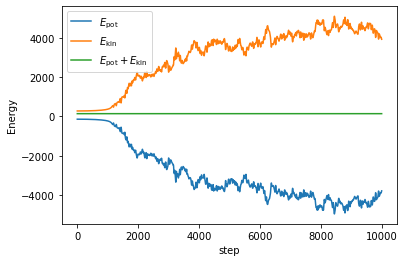

In [6]:
steparr = np.arange(N_STEPS)

# Plot energy
plt.plot(steparr, pot, label="$E_\mathrm{pot}$")
plt.plot(steparr, kin, label="$E_\mathrm{kin}$")
plt.plot(steparr, pot + kin, label="$E_\mathrm{pot} + E_\mathrm{kin}$")
plt.legend()
plt.xlabel("step")
plt.ylabel("Energy")
plt.show()

In [7]:
# runtime comparison
from coordinates import *
from verlet import *
from verlet_slow import *

TIMESTEP_RT = 0.001
N_STEPS_RT = 100
NUMBER_FCC_UNITS_RT = [1,2,3,4]

rt1 = np.zeros(len(NUMBER_FCC_UNITS_RT))
rt2 = np.zeros(len(NUMBER_FCC_UNITS_RT))
rt3 = np.zeros(len(NUMBER_FCC_UNITS_RT))

# do_md(positions_ini_rt, velocities_ini_rt, TIMESTEP_RT, N_STEPS_RT[0])

for i in range(len(NUMBER_FCC_UNITS_RT)):
    positions_ini_rt = initialize_positions(NUMBER_FCC_UNITS_RT[i], REDUCED_DENSITY)
    velocities_ini_rt = initialize_velocities(positions_ini_rt, REDUCED_TEMPERATURE)
    time1 = %timeit -n 1 -r 1 -o do_md1(positions_ini_rt, velocities_ini_rt, TIMESTEP_RT, N_STEPS_RT)
    rt1[i] = np.mean(time1.timings)
    time1 = %timeit -n 1 -r 1 -o do_md2(positions_ini_rt, velocities_ini_rt, TIMESTEP_RT, N_STEPS_RT)
    rt2[i] = np.mean(time1.timings)
    time1 = %timeit -n 1 -r 1 -o do_md(positions_ini_rt, velocities_ini_rt, TIMESTEP_RT, N_STEPS_RT)
    rt3[i] = np.mean(time1.timings)


100%|██████████| 99/99 [00:00<00:00, 5332.56it/s]


25.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


100%|██████████| 99/99 [00:00<00:00, 6796.12it/s]


16.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


100%|██████████| 99/99 [00:00<00:00, 4986.62it/s]


23.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


100%|██████████| 99/99 [00:00<00:00, 118.65it/s]


844 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


100%|██████████| 99/99 [00:00<00:00, 174.32it/s]


575 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


100%|██████████| 99/99 [00:00<00:00, 718.21it/s]


142 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


100%|██████████| 99/99 [00:09<00:00, 10.52it/s]


9.51 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


100%|██████████| 99/99 [00:06<00:00, 15.63it/s]


6.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


100%|██████████| 99/99 [00:00<00:00, 195.55it/s]


514 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


100%|██████████| 99/99 [00:52<00:00,  1.89it/s]


53 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


100%|██████████| 99/99 [00:35<00:00,  2.82it/s]


35.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


100%|██████████| 99/99 [00:01<00:00, 68.63it/s]

1.46 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


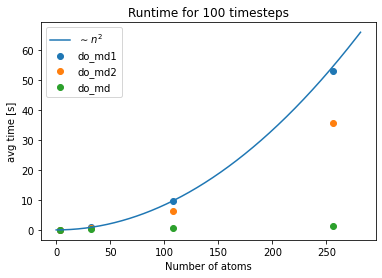

In [8]:
Natoms = 4 * np.array(NUMBER_FCC_UNITS_RT)**3
plt.scatter(Natoms, rt1, marker='o',label='do_md1')
plt.scatter(Natoms, rt2, marker='o', label='do_md2')
plt.scatter(Natoms, rt3, marker='o', label='do_md')
plt.plot(np.linspace(0, 1.1 * Natoms[-1], 1000), 0.00083 * np.linspace(0, 1.1 * Natoms[-1], 1000)**2, label=r"$\sim n^2$")
plt.xlabel('Number of atoms')
plt.ylabel('avg time [s]')
plt.title(f'Runtime for {N_STEPS_RT} timesteps')
plt.legend()